In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import matplotlib.font_manager as fm 
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc' 
font = fm.FontProperties(fname=font_path).get_name() 
matplotlib.rc('font', family=font) 

In [84]:
df = pd.read_csv('../../data/점포_자치구.csv')

In [85]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64715 entries, 0 to 64714
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준_년분기_코드    64715 non-null  int64  
 1   자치구_코드       64715 non-null  int64  
 2   자치구_코드_명     64715 non-null  object 
 3   서비스_업종_코드    64715 non-null  object 
 4   서비스_업종_코드_명  64715 non-null  object 
 5   점포_수         64715 non-null  float64
 6   유사_업종_점포_수   64715 non-null  float64
 7   개업_률         64715 non-null  float64
 8   개업_점포_수      64715 non-null  float64
 9   폐업_률         64715 non-null  float64
 10  폐업_점포_수      64715 non-null  float64
 11  프랜차이즈_점포_수   64715 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.9+ MB


In [86]:
df.describe()

,기준_년분기_코드,자치구_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,64715.000000,64715.000000,64715.000000,64715.000000,64715.000000,64715.000000,64715.000000,64715.000000,64715.000000
mean,20220.112354,11416.641119,231.817878,252.984316,2.858398,7.734034,2.460425,6.676057,21.166437
std,18.780136,186.507300,522.451445,543.205972,4.116950,18.148457,4.137240,15.924205,58.246625
min,20191.000000,11110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20203.000000,11260.000000,40.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20221.000000,11410.000000,105.000000,116.000000,2.100000,2.000000,1.800000,2.000000,1.000000
75%,20234.000000,11560.000000,229.000000,256.000000,4.100000,8.000000,3.400000,6.000000,9.000000
max,20252.000000,11740.000000,17827.000000,17845.000000,100.000000,773.000000,200.000000,554.000000,688.000000


In [87]:
# 불필요한 column 제거
drop_col = ['자치구_코드', '서비스_업종_코드']
df = df.drop(drop_col, axis=1)

In [88]:
# 분기 별 자치구 점포 수 확인
stores_counts = df.groupby(['기준_년분기_코드', '자치구_코드_명'])['점포_수'].sum().reset_index()

print(stores_counts)

     기준_년분기_코드 자치구_코드_명     점포_수
0        20191      강남구  50322.0
1        20191      강동구  19200.0
2        20191      강북구  11981.0
3        20191      강서구  23677.0
4        20191      관악구  17772.0
..         ...      ...      ...
645      20252      용산구  18513.0
646      20252      은평구  18212.0
647      20252      종로구  23420.0
648      20252       중구  36709.0
649      20252      중랑구  16405.0

[650 rows x 3 columns]


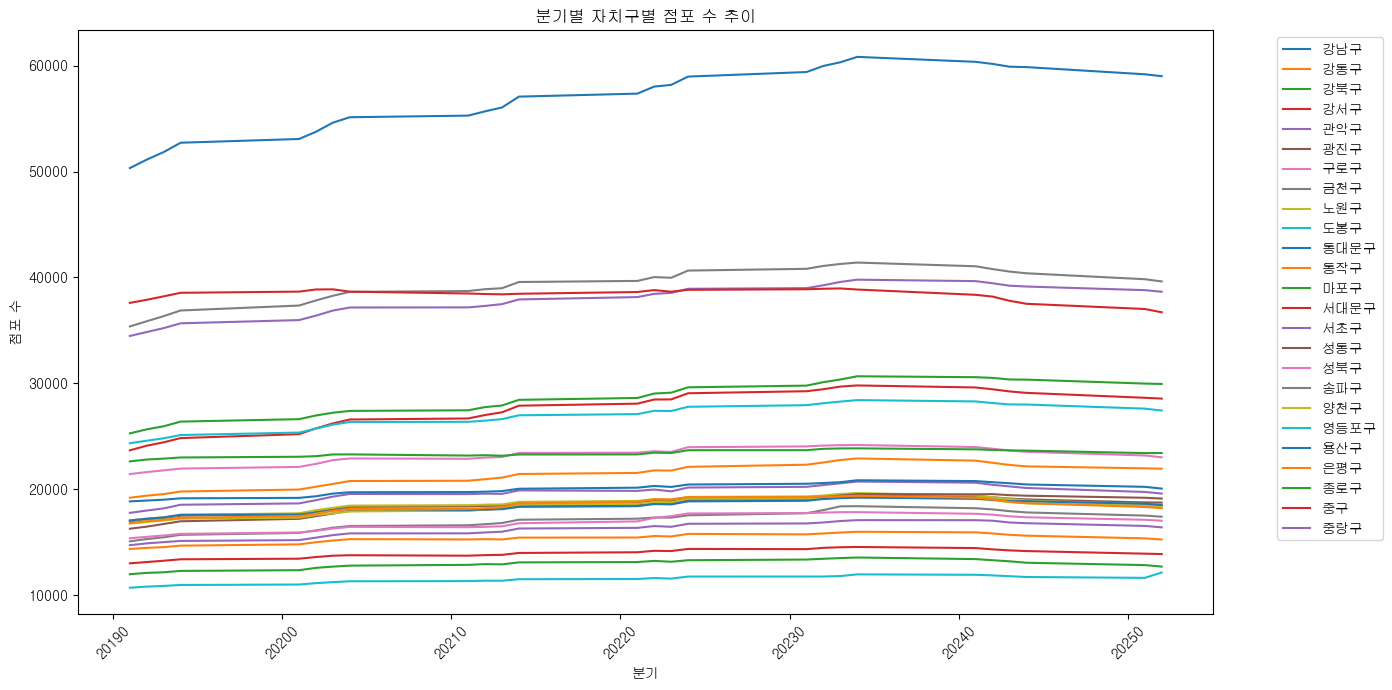

In [89]:
# 분기별 점포 수 추이 확인 시각화
plt.figure(figsize=(14, 7))

for gu in stores_counts['자치구_코드_명'].unique():
    subset = stores_counts[stores_counts['자치구_코드_명'] == gu]
    plt.plot(subset['기준_년분기_코드'], subset['점포_수'], label=gu)

plt.xticks(rotation=45)
plt.title('분기별 자치구별 점포 수 추이')
plt.xlabel('분기')
plt.ylabel('점포 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

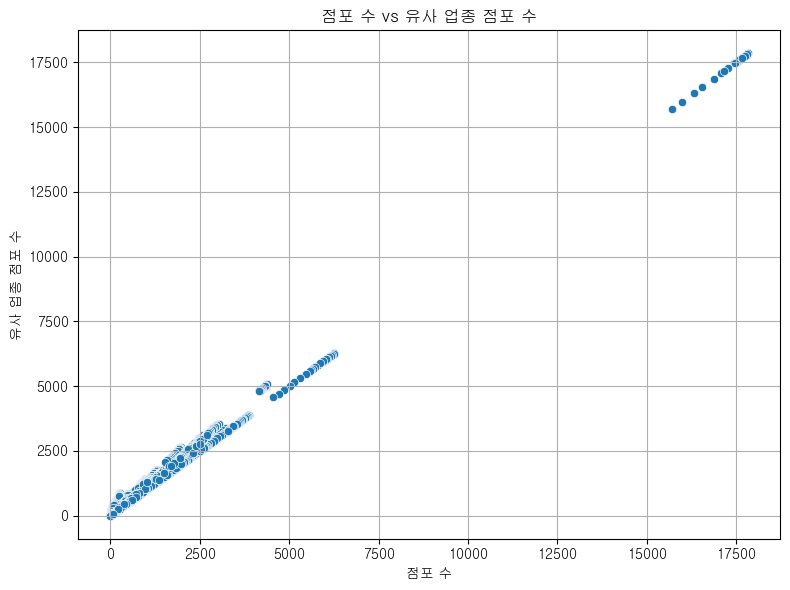

In [90]:
# 점포 수와 유사 업종 점포 수 상관관계 확인 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='점포_수', y='유사_업종_점포_수')

plt.title('점포 수 vs 유사 업종 점포 수')
plt.xlabel('점포 수')
plt.ylabel('유사 업종 점포 수')
plt.grid(True)
plt.tight_layout()
plt.show()

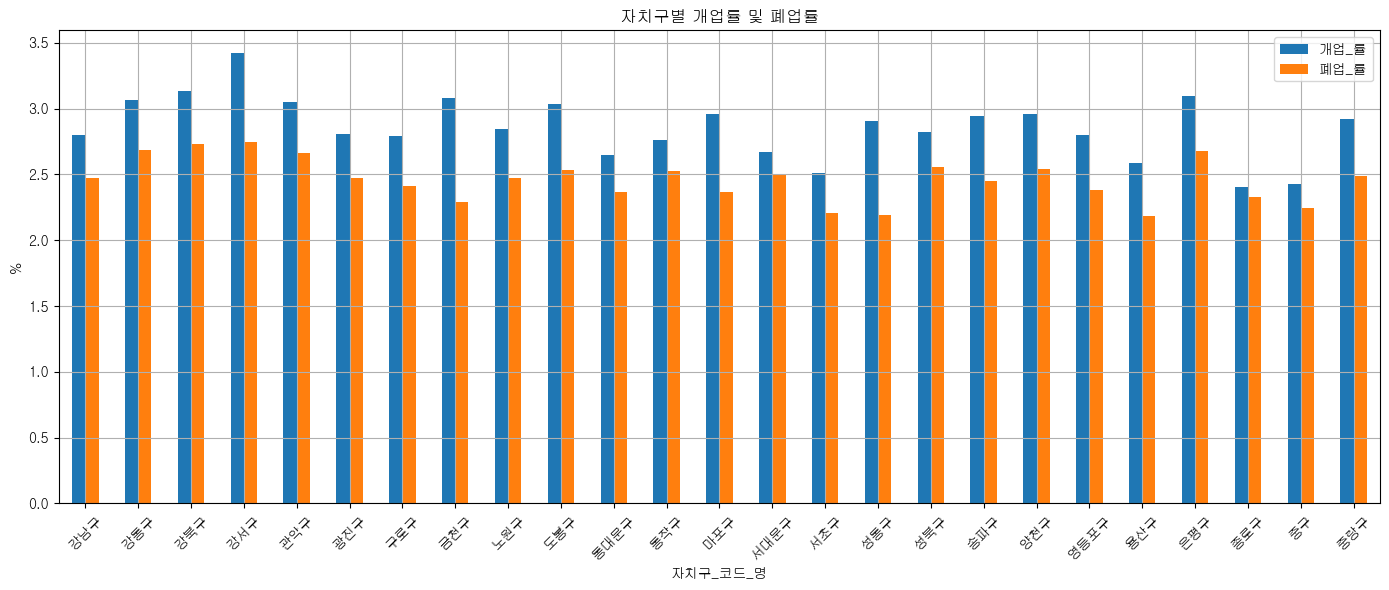

In [91]:
# 자치구별 개업률/폐업률 시각화
open_close = df.groupby('자치구_코드_명')[['개업_률', '폐업_률']].mean().reset_index()

open_close.plot(x='자치구_코드_명', kind='bar', figsize=(14, 6))
plt.title('자치구별 개업률 및 폐업률')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# 프랜차이즈 점포 수 분포 파악
print(df['프랜차이즈_점포_수'].describe())

count    64715.000000
mean        21.166437
std         58.246625
min          0.000000
25%          0.000000
50%          1.000000
75%          9.000000
max        688.000000
Name: 프랜차이즈_점포_수, dtype: float64


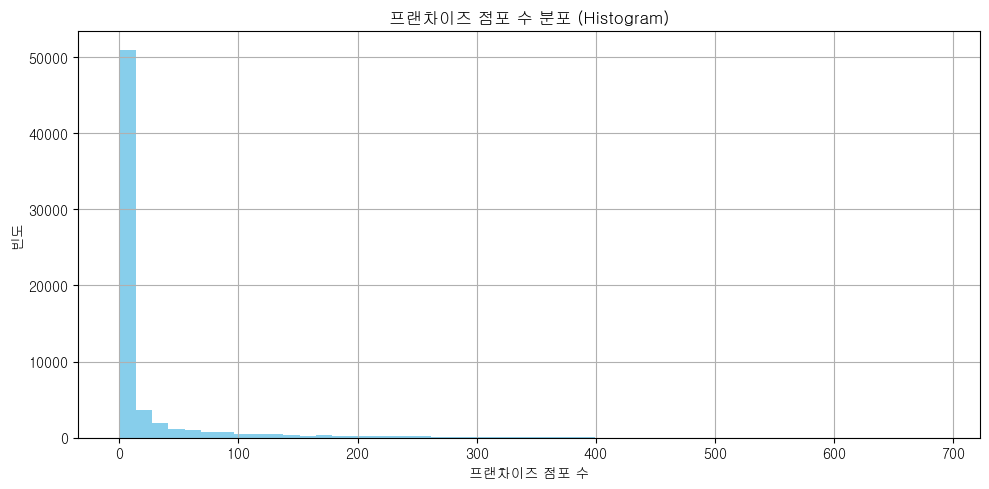

In [93]:
# 프랜차이즈 점포 수 히스토그램 확인
plt.figure(figsize=(10, 5))
plt.hist(df['프랜차이즈_점포_수'], bins=50, color='skyblue')
plt.title('프랜차이즈 점포 수 분포 (Histogram)')
plt.xlabel('프랜차이즈 점포 수')
plt.ylabel('빈도')
plt.grid(True)
plt.tight_layout()
plt.show()

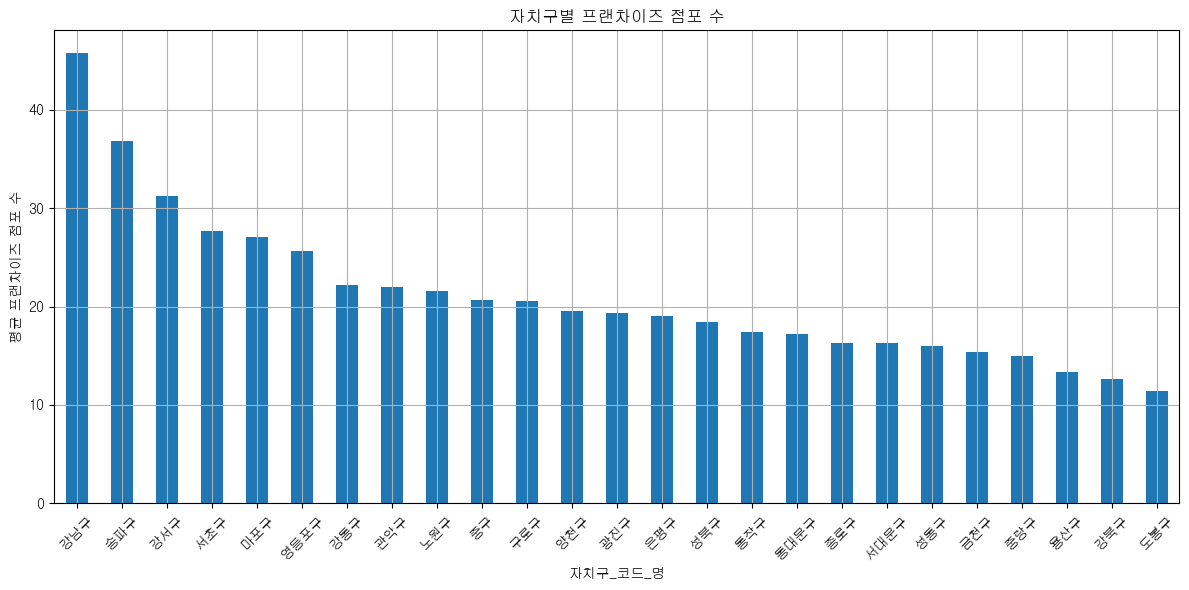

In [94]:
# 자치구별 프랜차이즈 점포 수 확인
franchise_by_gu = df.groupby('자치구_코드_명')['프랜차이즈_점포_수'].mean().sort_values(ascending=False)

franchise_by_gu.plot(kind='bar', figsize=(12, 6), title='자치구별 프랜차이즈 점포 수')
plt.ylabel('평균 프랜차이즈 점포 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

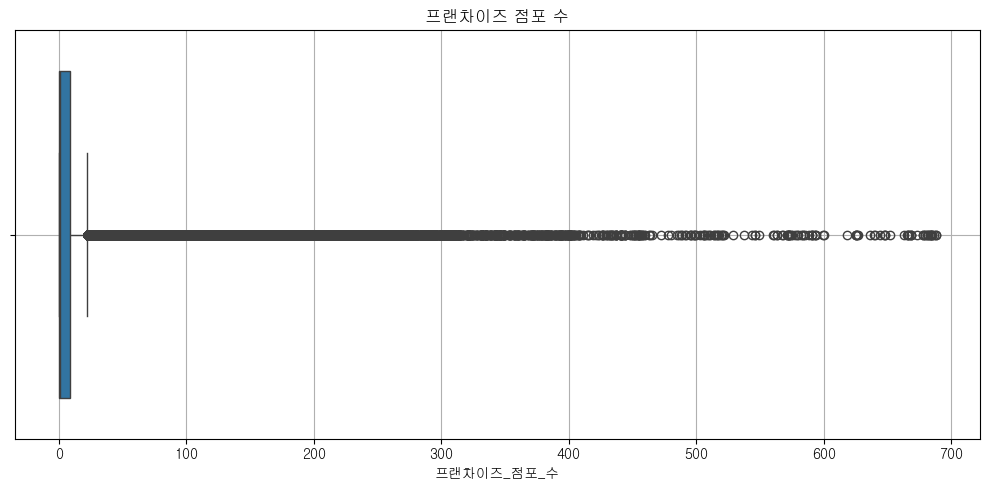

In [95]:
# 프랜차이즈 점포 수 이상치 확인을 위한 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['프랜차이즈_점포_수'])
plt.title('프랜차이즈 점포 수')
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# 분기별 자치구별 가장 많은 업종 확인
grouped = df.groupby(['기준_년분기_코드', '자치구_코드_명', '서비스_업종_코드_명'])['점포_수'].sum().reset_index()

# 점포수 내림차순 정렬 후, 자치구-분기별로 첫 번째 업종만 추출
top_industries = grouped.sort_values(['기준_년분기_코드', '자치구_코드_명', '점포_수'], ascending=[True, True, False])
top_industries = top_industries.drop_duplicates(subset=['자치구_코드_명', '기준_년분기_코드'])

print(top_industries)

       기준_년분기_코드 자치구_코드_명 서비스_업종_코드_명     점포_수
31         20191      강남구      부동산중개업   4564.0
193        20191      강동구       한식음식점   1922.0
291        20191      강북구       한식음식점   1593.0
391        20191      강서구       한식음식점   2172.0
490        20191      관악구       한식음식점   1954.0
...          ...      ...         ...      ...
64300      20252      용산구  컴퓨터및주변장치판매   2349.0
64408      20252      은평구       한식음식점   1821.0
64458      20252      종로구      시계및귀금속   2631.0
64578      20252       중구        일반의류  15688.0
64708      20252      중랑구       한식음식점   1928.0

[650 rows x 4 columns]


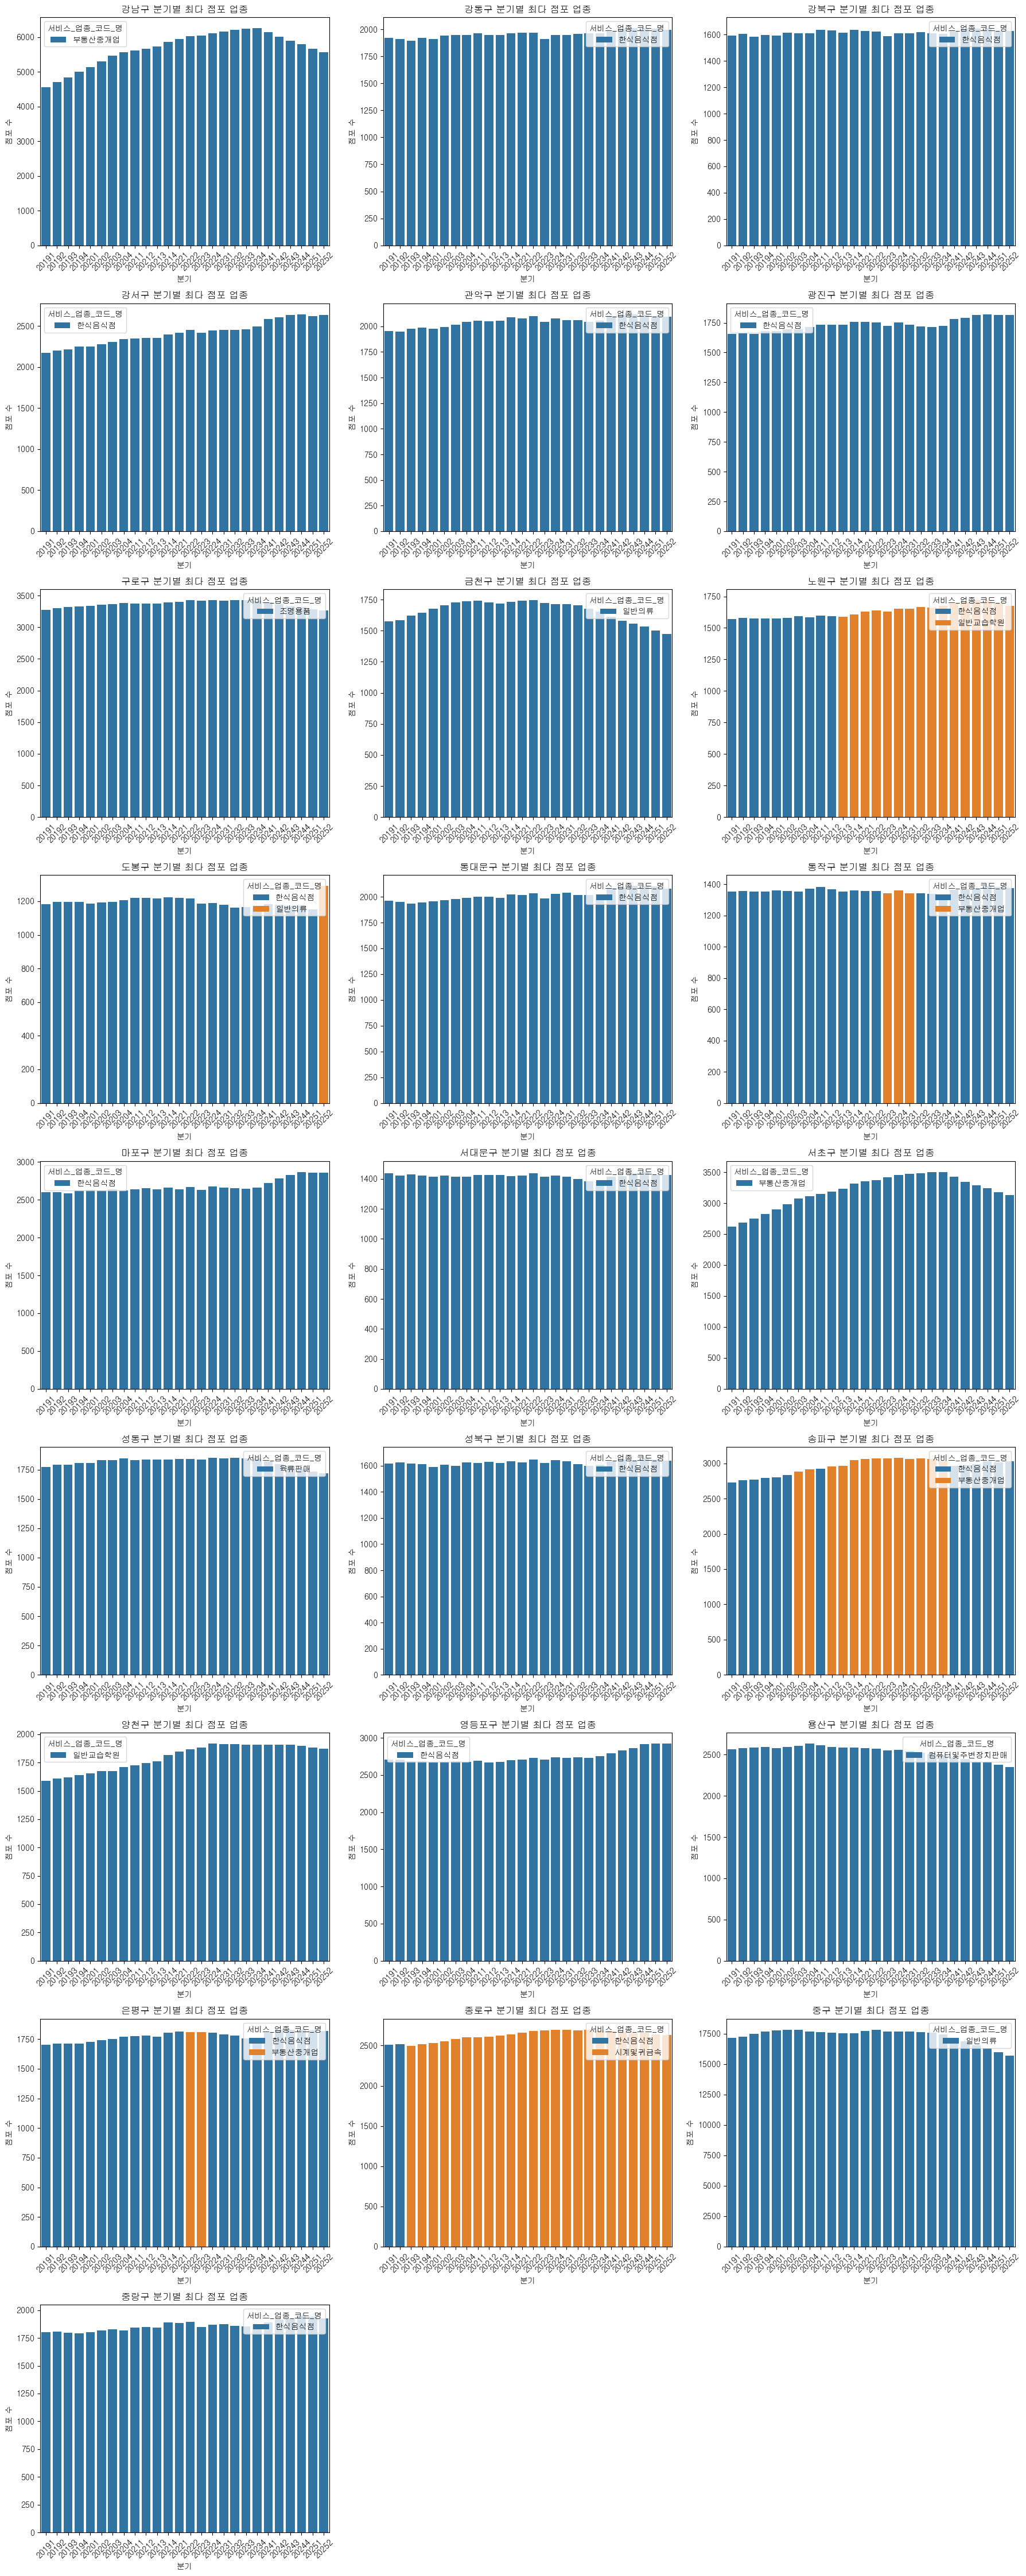

In [ ]:
# 자치구별 분기별 가장 많은 업종 확인 시각화
gu_list = top_industries['자치구_코드_명'].unique()

# 자치구별로 subplot으로 나눠서 보기
n = len(gu_list)
cols = 3
rows = (n // cols) + (n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))

for i, gu in enumerate(gu_list):
    ax = axes[i // cols, i % cols]
    temp = top_industries[top_industries['자치구_코드_명'] == gu]
    sns.barplot(data=temp, x='기준_년분기_코드', y='점포_수', hue='서비스_업종_코드_명', ax=ax)
    ax.set_title(f'{gu} 분기별 최다 점포 업종')
    ax.set_xlabel('분기')
    ax.set_ylabel('점포 수')
    ax.tick_params(axis='x', rotation=45)

# 빈 subplot 제거
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

In [97]:
# # 데이터 저장
df.sort_values('기준_년분기_코드', inplace=True)
df.to_csv('stores_data.csv')